In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold,f_classif,f_regression,SelectKBest,SelectPercentile

In [5]:
df = pd.read_csv("D:/Python DataScience/Feature Selection/santander-train.csv",nrows=20000)
X = df.drop(['TARGET'],axis=1)
y = df['TARGET']
X_train ,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)
duplicated_features = X_train_T.duplicated()
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [6]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

## Annova Test for the Classification Problem

### F-Test

In [8]:
sel = f_classif(X_train_unique,y_train)
sel

(array([3.42911520e-01, 1.22929093e+00, 1.61291330e+02, 4.01025132e-01,
        8.37661151e-01, 2.39279390e-03, 4.41633351e-02, 1.36337510e-01,
        1.84647123e+00, 2.03640367e+00, 7.98057954e-03, 1.14063993e+00,
        6.32266614e-03, 1.55626237e+01, 1.53553790e+01, 1.28615978e+01,
        1.61834746e+01, 1.59638013e+01, 1.21977511e+01, 9.03776687e-02,
        1.00443179e+00, 1.53946148e+01, 2.50428951e+02, 2.98696944e+01,
        1.06266841e+01, 2.63630437e+01, 1.66417611e+01, 3.13699473e+01,
        2.47256550e+01, 2.60021376e+01, 3.26742018e+01, 9.94259060e+00,
        1.48208220e+01, 1.50040146e+01, 1.34739830e+01, 7.03118653e+00,
        1.36234772e+01, 7.95962134e+00, 3.15161070e+02, 1.79631284e+00,
        1.66910747e+00, 1.21138302e+01, 1.10928892e+01, 1.00443179e+00,
        2.31851572e+00, 8.93973153e+01, 7.53868668e+00, 2.38490562e+02,
        2.98696944e+01, 1.06266841e+01, 2.61694409e+01, 1.66053267e+01,
        2.93013259e+01, 2.44433356e+01, 2.60021376e+01, 5.596238

### if p values are less then 0.05 then only its important

In [10]:
p_values = pd.Series(sel[1])
p_values.index=X_train_unique.columns
p_values.sort_values(ascending=True,inplace=True)

In [11]:
p_values

40     7.665738e-70
182    1.494938e-68
86     4.187175e-61
22     5.565785e-56
101    3.557912e-55
           ...     
10     9.288175e-01
12     9.366238e-01
188    9.388951e-01
5      9.609867e-01
75     9.826291e-01
Length: 227, dtype: float64

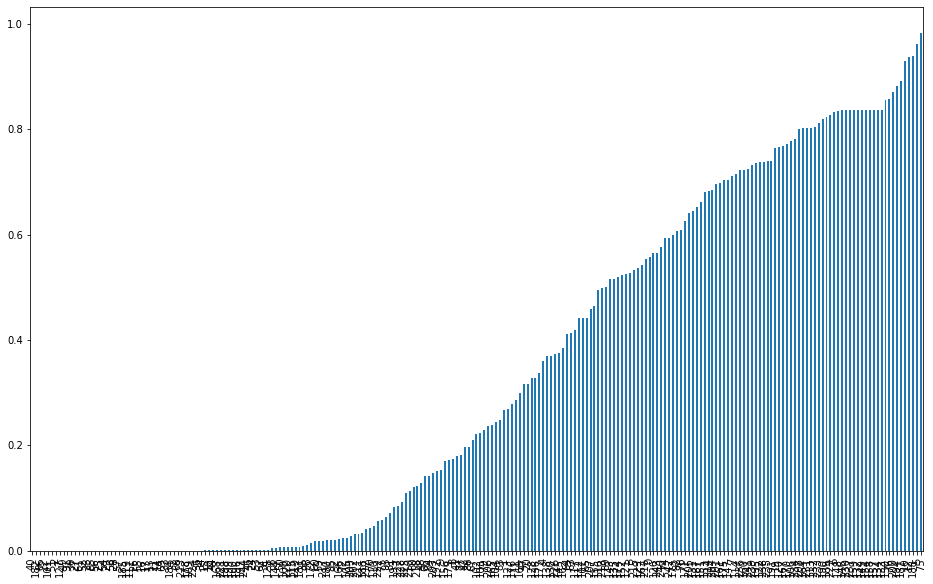

In [13]:
p_values.plot.bar(figsize=(16,10))

In [15]:
p_values = p_values[p_values<0.05]

In [16]:
len(p_values)

88

In [17]:
p_values.index

Int64Index([ 40, 182,  86,  22, 101,  51,   2, 127,  49,  91,  30,  27,  61,
             52,  23,  85,  56,  25,  54,  29,  58,  28,  57, 185, 119, 111,
             26,  55,  16,  17,  13,  21,  14,  69,  33, 184,  32,  68, 223,
            178, 109, 224,  36,  34,  15,  18,  44, 168, 221, 198, 199, 100,
            196, 197, 244,  46,  24,  53,  62,  31, 125,  38, 144,  50, 108,
            220, 115, 219, 183,  35,  98, 172,  60,  59, 217, 180,  95,  92,
            166,  72, 105, 209, 202, 211, 186, 212,  70, 110],
           dtype='int64')

In [18]:
X_train_p = X_train_unique[p_values.index]
X_test_p = X_test_unique[p_values.index]

In [19]:
def runRandomForest(X_train,X_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy : ",accuracy_score(y_test,y_pred))

In [20]:
%%time
runRandomForest(X_train_p,X_test_p,y_train,y_test)

Accuracy :  0.953
Wall time: 1.58 s
